<a href="https://colab.research.google.com/github/Davron030901/Scikit_learning/blob/main/Lasso_Regression_with_Scikit_Learn_(Beginner_Friendly).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

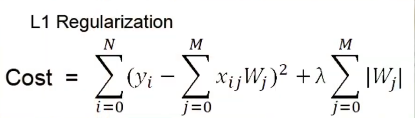

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
ca_housing=fetch_california_housing()

In [ ]:
X=ca_housing.data
y=ca_housing.target

In [ ]:
ca_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
ca_housing.target_names

['MedHouseVal']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=19)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso()

In [ ]:
lasso.fit(X_train,y_train)

Lasso()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
y_pred=lasso.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

0.9119430573559844

In [ ]:
mean_squared_error(y_test,y_pred)

1.3264181489134033

In [ ]:
r2_score(y_test,y_pred)

-4.109353628090062e-05

In [ ]:
param_grid={
    'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso_cv=GridSearchCV(lasso,param_grid,cv=3,n_jobs=-1)

In [ ]:
lasso_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
y_pred2=lasso_cv.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred2)

0.5353500594399228

In [ ]:
mean_squared_error(y_test,y_pred2)

0.5211195697368167

In [ ]:
r2_score(y_test,y_pred2)

0.60710656378633

In [ ]:
lasso_cv.best_estimator_

Lasso(alpha=0.001)

In [ ]:
lasso3=Lasso(alpha=0.001)

In [ ]:
lasso3.fit(X_train,y_train)

Lasso(alpha=0.001)

In [ ]:
lasso3.coef_

array([ 0.83673788,  0.12126534, -0.26089701,  0.30370697, -0.00173652,
       -0.02849403, -0.8865986 , -0.86020295])

In [ ]:
lasso3.intercept_

2.0670816194279977

In [ ]:
import pandas as pd

In [ ]:
features_names=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']

In [ ]:
df=pd.DataFrame({'Features_Names':features_names,'Coef':lasso3.coef_})

In [ ]:
df

,Features_Names,Coef
0,MedInc,0.836738
1,HouseAge,0.121265
2,AveRooms,-0.260897
3,AveBedrms,0.303707
4,Population,-0.001737
5,AveOccup,-0.028494
6,Latitude,-0.886599
7,Longitude,-0.860203
